<a href="https://colab.research.google.com/github/beyg1/Q4/blob/main/Openai%20SDK/AgentHandoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uq openai-agents tavily-python

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import os
from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel
from google.colab import userdata

gemini_api_key = userdata.get("GOOGLE_API_KEY")
search_api_key = userdata.get("Tavily_API_Key")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client
)

In [ ]:
from agents import set_tracing_disabled

set_tracing_disabled(True)

In [ ]:
from agents.tool import function_tool
from tavily import TavilyClient

@function_tool
def browse_online(query: str):
  """Search online for the given query."""
  tavily_client = TavilyClient(api_key=search_api_key)
  response = tavily_client.search(query)
  return response

In [ ]:
from agents import Agent, Runner


Panaversity_Agent = Agent(
      name="Panaversity_Agent",
      instructions="""
      You are an helpful assisstant for an online university "Panaversity.org".
      Answer all querries related to Panaversity by using the browse_online tool.
      crawl the Panaversity.org website using browse_online tool and answer the querries.
      """,
      tools=[browse_online],
      handoffs=[],
      model=model,
  )
Agentia_World_Agent = Agent(
      name="Agentia_World_Agent",
      instructions="""
      You are an helpful assisstant for an online company "Agentia World".
      Agentia World specializes in AI and Agentic Ai solutions for businesses.
      Answer all querries related to Agentic Solutions or applications the user might need.
      """,
      tools=[],
      handoffs=[],
      model=model,
  )
Web_dev_Agent = Agent(
      name="Panacloud_Agent",
      instructions="""
      You are a helpful assistant who is Specialized in offering Web development Solutions.
      """,
      tools=[],
      handoffs=[],
      model=model,
  )
Mobil_dev_Agent = Agent(
      name="Panacloud_Agent",
      instructions="""
      You are a helpful assistant who is Specialized in offering Mobile app development Solutions.
      """,
      tools=[],
      handoffs=[],
      model=model,
  )
Panacloud_Agent = Agent(
      name="Panacloud_Agent",
      instructions="""
      You are an helpful assisstant for an online company "Panacloud".
      Panacloud specializes in Web development and mobile app development for businesses.
      Answer all querries related to Web Development or mobile app development by using
      Web_dev_Agent or Mobil_dev_Agent as your tools.
      """,
      tools=[Web_dev_Agent.as_tool(tool_name="Web_dev_Agent",
                             tool_description="Specialized in offering Web development Solutions."
                             ),
             Mobil_dev_Agent.as_tool(tool_name="Mobil_dev_Agent",
                             tool_description="Specialized in offering mobile app development Solutions."
                             )
      ],
      handoffs=[],
      model=model,
  )
PIAIC_Agent = Agent(
      name="PIAIC_Agent",
      instructions="""
      You are the Orchestrator Agent which handels all the agents. Panaversity_Agent
      for querries related to Panaversity, Agentia_World_Agent for querries related to
      Agents and Agentic applications/Solutions the user might need and Panacloud_Agent
      for querries related to Web development or mobile app development as Panacloud is
      a software house.
      """,
      tools=[],
      handoffs=[Panaversity_Agent,Agentia_World_Agent,Panacloud_Agent],
      model=model,
  )



# get a graphical representation of your Agentic System

In [ ]:
!pip install -q "openai-agents[viz]"


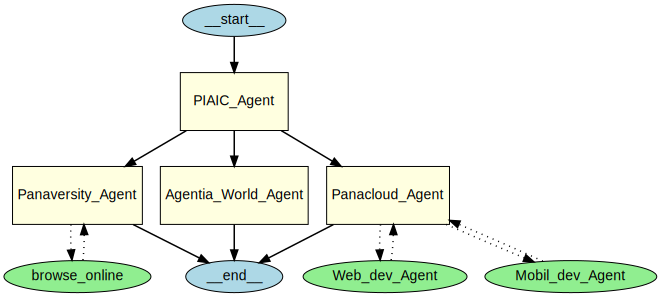

In [ ]:
from agents.extensions.visualization import draw_graph

draw_graph(PIAIC_Agent)

In [ ]:
response = Runner.run_sync(PIAIC_Agent, "Hey")

print(f"**{response.last_agent.name}**:\n\n {response.final_output}")

**PIAIC_Agent**:

 Hello! How can I help you today? Are you interested in Panaversity, Agentia World, or Panacloud?



In [ ]:
response = Runner.run_sync(PIAIC_Agent, "Which is the best course related to ai in panaversity")

print(f"**{response.last_agent.name}**:\n\n {response.final_output}")

**Panaversity_Agent**:

 Based on the search results, Panaversity offers cutting-edge programs in Agentic AI. A specific course, "Learn Advanced Agentic AI Engineering | Panaversity Flagship Program", focuses on advanced Agentic AI engineering using frameworks like LangGraph and LangChain. It seems like a strong option if you're interested in that area. You can find it on their website.



In [ ]:
response = Runner.run_sync(PIAIC_Agent, "I have a business in services industry. how can i increase digital exposure?")

print(f"**{response.last_agent.name}**:\n\n {response.final_output}")

**Panacloud_Agent**:

 To increase digital exposure for your services business, would you like to explore web development solutions or mobile app development solutions?



In [ ]:
response = Runner.run_sync(PIAIC_Agent, "I have a business in services industry. I was thinking of getting a landing page. can you guide me?")

print(f"**{response.last_agent.name}**:\n\n {response.final_output}")

**Panacloud_Agent**:

 Okay, great! A landing page is a fantastic investment for a service-based business. It can be a highly effective way to generate leads, book appointments, and showcase your expertise. Here's a guide to help you through the process:

**1. Define Your Goal:**

*   **What is the primary action you want visitors to take on your landing page?** This is your Key Performance Indicator (KPI). Common goals include:
    *   **Lead Generation:** Collecting email addresses, phone numbers, or other contact information.
    *   **Appointment Booking:** Scheduling consultations, demos, or service appointments.
    *   **Direct Sale:** Selling a specific service package directly.
    *   **Free Trial/Consultation Sign-up:** Encouraging users to try your service.
    *   **Download Resource:** Offering a free guide, ebook, or checklist in exchange for contact information.
*   **Who is your target audience?** Understanding their needs, pain points, and motivations is crucial for c